In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime

### 1.文本API示例

下面的命令是介绍了通过pyplot API和objected-oriented API分别创建文本的方式。

| pyplot API | OO API  | description  |
| ---------- | ------- | ------------ |
| `text` | `text` | 在子图axes的任意位置添加文本|
| `annotate` | `annotate` | 在子图axes的任意位置添加注解，包含指向性的箭头|
| `xlabel` | `set_xlabel` | 为子图axes添加x轴标签 |
| `ylabel` | `set_ylabel` | 为子图axes添加y轴标签 |
| `title` | `set_title` | 为子图axes添加标题 |
| `figtext` | `text` | 在画布figure的任意位置添加文本  |
| `suptitle` | `suptitle` | 为画布figure添加标题 |

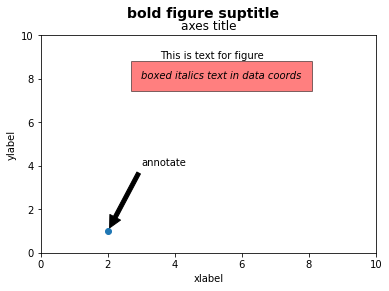

In [2]:
fig = plt.figure()
ax = fig.add_subplot()


# 分别为figure和ax设置标题，注意两者的位置是不同的
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

# 设置x和y轴标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x和y轴显示范围均为0到10
ax.axis([0, 10, 0, 10])

# 在子图上添加文本
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 在画布上添加文本，一般在子图上添加文本是更常见的操作，这种方法很少用
fig.text(0.4,0.8,'This is text for figure')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05));

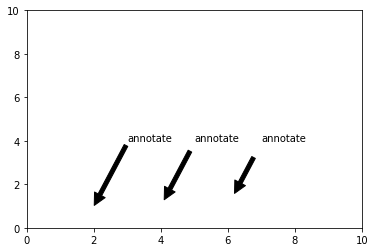

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
# 设置x和y轴显示范围均为0到10
ax.axis([0, 10, 0, 10])
# ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.01));
ax.annotate('annotate', xy=(4, 1), xytext=(5, 4),arrowprops=dict(facecolor='black', shrink=0.1));
ax.annotate('annotate', xy=(6, 1), xytext=(7, 4),arrowprops=dict(facecolor='black', shrink=0.2));

### 2.text - 子图上的文本

text的调用方式为`Axes.text(x, y, s, fontdict=None, **kwargs) `  
其中`x`,`y`为文本出现的位置，默认状态下即为当前坐标系下的坐标值，  
`s`为文本的内容，  
`fontdict`是可选参数，用于覆盖默认的文本属性，  
`**kwargs`为关键字参数，也可以用于传入文本样式参数

重点解释下fontdict和\*\*kwargs参数，这两种方式都可以用于调整呈现的文本样式，最终效果是一样的，不仅text方法，其他文本方法如set_xlabel,set_title等同样适用这两种方式修改样式。通过一个例子演示这两种方法是如何使用的。

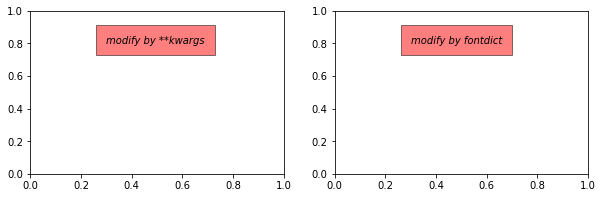

In [4]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'modify by **kwargs', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

# 使用fontdict参数修改文本样式
font = {'bbox':{'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, 'style':'italic'}
axes[1].text(0.3, 0.8, 'modify by fontdict', fontdict=font);


下表列举了一些常用的参数供参考。

| Property                      | Description                                |
| ------------------------ | :-------------------------- |
| `alpha` |float or None   透明度，越接近0越透明，越接近1越不透明   |
| `backgroundcolor` | color  文本的背景颜色                   |
| `bbox` | dict with properties for patches.FancyBboxPatch 用来设置text周围的box外框 |
| `color` or c | color 字体的颜色             |
| `fontfamily` or family | {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'} 字体的类型|
| `fontsize` or size | float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'} 字体大小|
| `fontstyle` or style | {'normal', 'italic', 'oblique'} 字体的样式是否倾斜等     |
| `fontweight` or weight | {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'} 文本粗细|
| `horizontalalignment` or ha | {'center', 'right', 'left'}  选择文本左对齐右对齐还是居中对齐         |
| `linespacing` | float (multiple of font size)   文本间距 |
| `rotation` | float or {'vertical', 'horizontal'} 指text逆时针旋转的角度，“horizontal”等于0，“vertical”等于90  |
| `verticalalignment` or va | {'center', 'top', 'bottom', 'baseline', 'center_baseline'}  文本在垂直角度的对齐方式 |

### 3.xlabel和ylabel - 子图的x，y轴标签

xlabel的调用方式为`Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)`  
ylabel方式类似，这里不重复写出。  
其中`xlabel`即为标签内容,  
`fontdict`和`**kwargs`用来修改样式，上一小节已介绍,  
`labelpad`为标签和坐标轴的距离，默认为4，  
`loc`为标签位置，可选的值为'left', 'center', 'right'之一，默认为居中

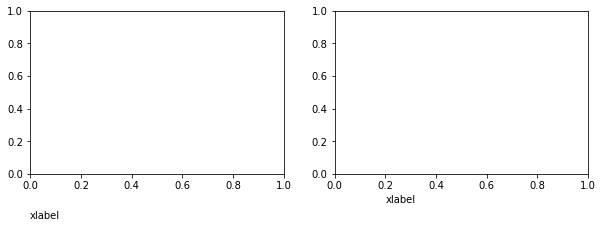

In [5]:
# 观察labelpad和loc参数的使用效果
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)
axes[0].set_xlabel('xlabel',labelpad=20,loc='left')

# loc参数仅能提供粗略的位置调整，如果想要更精确的设置标签的位置，可以使用position参数+horizontalalignment参数来定位
# position由一个元组过程，第一个元素0.2表示x轴标签在x轴的位置，第二个元素对于xlabel其实是无意义的，随便填一个数都可以
# horizontalalignment='left'表示左对齐，这样设置后x轴标签就能精确定位在x=0.2的位置处
axes[1].set_xlabel('xlabel', position=(0.2, _), horizontalalignment='left');

### 4.title和suptitle - 子图和画布的标题

title的调用方式为`Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)`  
其中label为子图标签的内容，`fontdict`,`loc`,`**kwargs`和之前小节相同不重复介绍  
`pad`是指标题偏离图表顶部的距离，默认为6    
`y`是title所在子图垂向的位置。默认值为1，即title位于子图的顶部。  

suptitle的调用方式为`figure.suptitle(t, **kwargs)`  
其中`t`为画布的标题内容

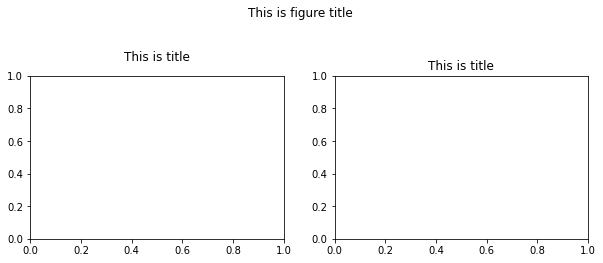

In [6]:
# 观察pad参数的使用效果
fig = plt.figure(figsize=(10,3))
fig.suptitle('This is figure title',y=1.2) # 通过参数y设置高度
axes = fig.subplots(1,2)
axes[0].set_title('This is title',pad=15)
axes[1].set_title('This is title',pad=6);

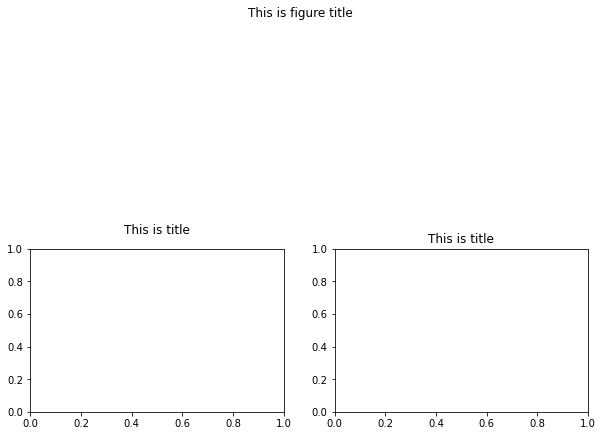

In [7]:
# 观察pad参数的使用效果
fig = plt.figure(figsize=(10,3))
fig.suptitle('This is figure title',y=2) # 通过参数y设置高度
axes = fig.subplots(1,2)
axes[0].set_title('This is title',pad=15)
axes[1].set_title('This is title',pad=6);

### 5.annotate - 子图的注解

annotate的调用方式为`Axes.annotate(text, xy, *args, **kwargs)`  
其中`text`为注解的内容，  
`xy`为注解箭头指向的坐标，  
其他常用的参数包括：  
`xytext`为注解文字的坐标，  
`xycoords`用来定义xy参数的坐标系，   
`textcoords`用来定义xytext参数的坐标系，  
`arrowprops`用来定义指向箭头的样式 
annotate的参数非常复杂，这里仅仅展示一个简单的例子，更多参数可以查看[官方文档中的annotate介绍](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)

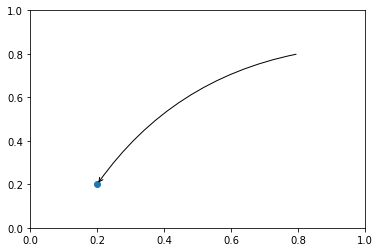

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0, 1, 0, 1])
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2")
            );
ax.plot([0.2], [0.2], 'o')
plt.show()

In [9]:
#该block讲述如何在matplotlib里面，修改字体默认属性，完成全局字体的更改。
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

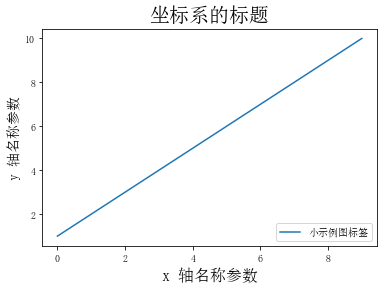

In [10]:
#局部字体的修改方法1
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')

# 直接用字体的名字
plt.xlabel('x 轴名称参数', fontproperties='SimSun', fontsize=16)         # 设置x轴名称，采用微软雅黑字体
plt.ylabel('y 轴名称参数', fontproperties='SimSun', fontsize=14)         # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties='SimSun', fontsize=20)         # 设置坐标系标题的字体
plt.legend(loc='lower right', prop={"family": 'SimSun'}, fontsize=10) ;   # 小示例图的字体设置

In [11]:
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

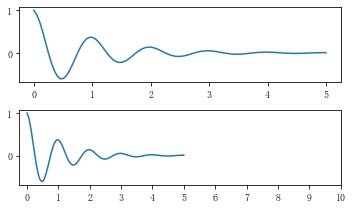

In [12]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 1.));

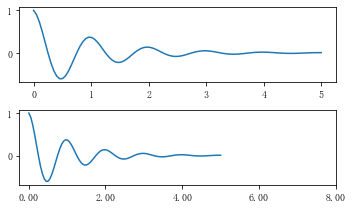

In [13]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla);

<a list of 14 Line2D ticklines objects>


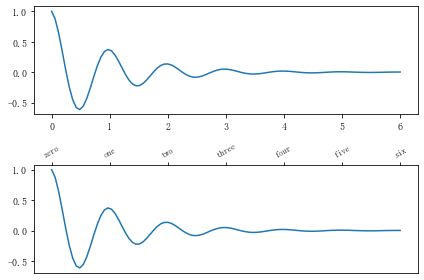

In [14]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应，然后再通过set_xticklabels设置刻度所对应的标签
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
x1 = np.linspace(0.0, 6.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
axs[0].plot(x1, y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1, y1)
axs[1].set_xticks([0,1,2,3,4,5,6])#要将x轴的刻度放在数据范围中的哪些位置
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],#设置刻度对应的标签
                   rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度。
axs[1].xaxis.set_ticks_position('top')#set_ticks_position()方法是用来设置刻度所在的位置，常用的参数有bottom、top、both、none
print(axs[1].xaxis.get_ticklines());

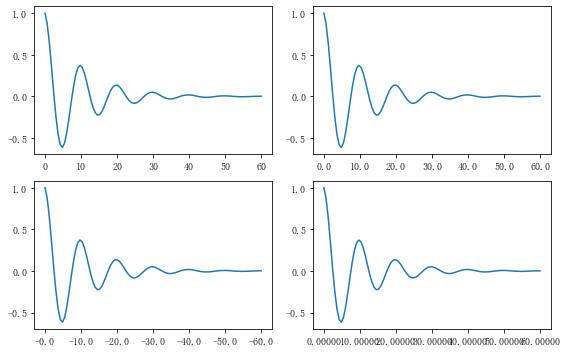

In [15]:
# 接收字符串格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter);

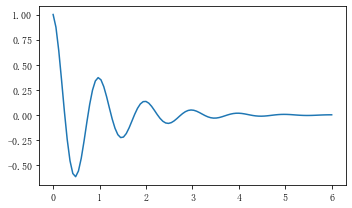

In [16]:
# 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''
def minformatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return ''
    else:
        return f'{x:1.2f}'

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
# ax.xaxis.set_major_formatter(formatoddticks);
ax.xaxis.set_minor_formatter(formatoddticks);

- locator=plt.MaxNLocator(nbins=7)#自动选择合适的位置，并且刻度之间最多不超过7（nbins）个间隔 
- locator=plt.FixedLocator(locs=[0,0.5,1.5,2.5,3.5,4.5,5.5,6])#直接指定刻度所在的位置
- locator=plt.AutoLocator()#自动分配刻度值的位置
- locator=plt.IndexLocator(offset=0.5, base=1)#面元间距是1，从0.5开始
- locator=plt.MultipleLocator(1.5)#将刻度的标签设置为1.5的倍数
- locator=plt.LinearLocator(numticks=5)#线性划分5等分，4个刻度

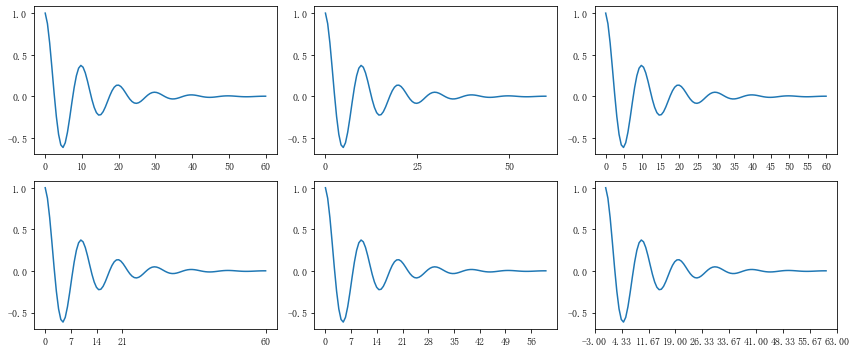

In [17]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 3, figsize=(12, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=3)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[0, 2].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.FixedLocator([0,7,14,21,60])
axs[1, 0].xaxis.set_major_locator(locator);

locator = matplotlib.ticker.IndexLocator(offset=0, base=7)
axs[1, 1].xaxis.set_major_locator(locator);

locator = matplotlib.ticker.LinearLocator(numticks=10)
axs[1, 2].xaxis.set_major_locator(locator);

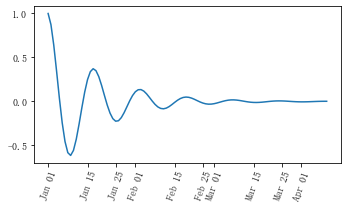

In [18]:
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);

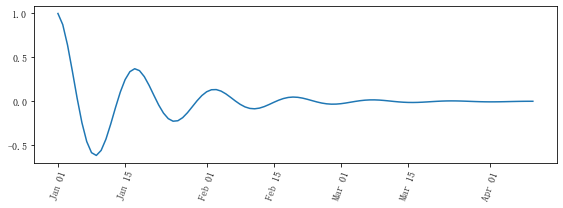

In [19]:
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
# ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);

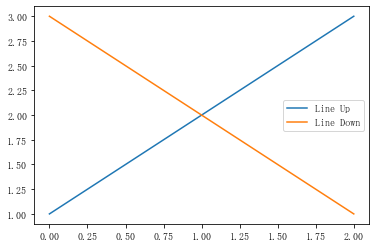

In [20]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend(handles = [line_up, line_down], labels = ['Line Up', 'Line Down']);

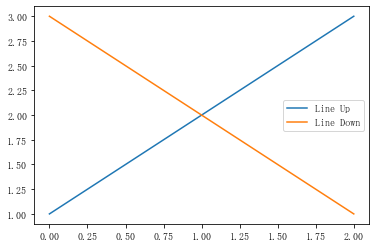

In [21]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend(handles = [line_up, line_down], labels = ['Line Up', 'Line Down']);

legend其他常用的几个参数如下：

**设置图例位置**  
loc参数接收一个字符串或数字表示图例出现的位置  
ax.legend(loc='upper center') 等同于ax.legend(loc=9)



| Location String | Location Code |
| --------------- | ------------- |
| 'best'          | 0             |
| 'upper right'   | 1             |
| 'upper left'    | 2             |
| 'lower left'    | 3             |
| 'lower right'   | 4             |
| 'right'         | 5             |
| 'center left'   | 6             |
| 'center right'  | 7             |
| 'lower center'  | 8             |
| 'upper center'  | 9             |
| 'center'        | 10            |

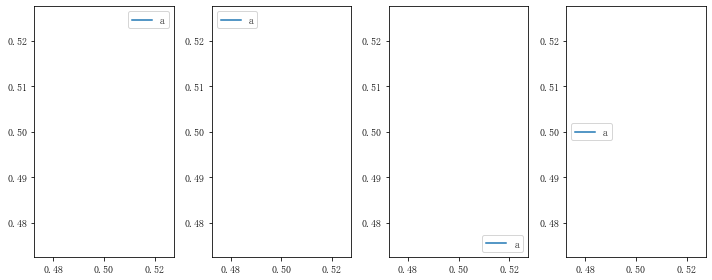

In [22]:
fig,axes = plt.subplots(1,4,figsize=(10,4))
for i in range(4):
    axes[i].plot([0.5],[0.5])
    axes[i].legend(labels='a',loc=i*2)  # 观察loc参数传入不同值时图例的位置
fig.tight_layout()

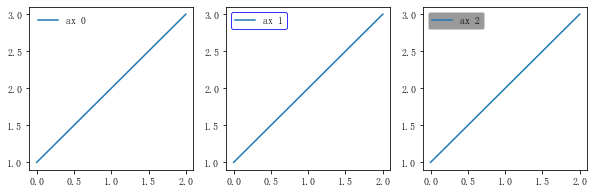

In [23]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,3)
for i, ax in enumerate(axes):
    ax.plot([1,2,3],label=f'ax {i}')
axes[0].legend(frameon=False) #去掉图例边框
axes[1].legend(edgecolor='blue') #设置图例边框颜色
axes[2].legend(facecolor='gray'); #设置图例背景颜色,若无边框,参数无效

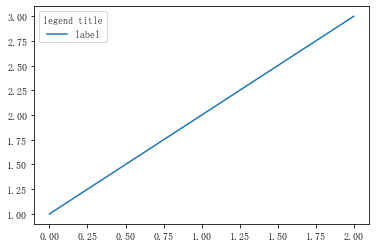

In [24]:
fig,ax =plt.subplots()
ax.plot([1,2,3],label='label')
ax.legend(title='legend title');

## 思考题
- 请尝试使用两种方式模仿画出下面的图表(重点是柱状图上的标签)，本文学习的text方法和matplotlib自带的柱状图标签方法bar_label
![](https://img-blog.csdnimg.cn/99bc6e007eb34fc09015589d56c6eafc.png)

In [105]:
y = np.array([1, 2, 3, 4, 5])
y_lable = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim'][::-1]
x = np.array([9.8, 10.5, 10.1, 8.7, 12.7][::-1])
offset = [0.72, 0.70, 0.16, 0.25, 0.71]
offset_lable = ['±0.72', '±0.70', '±0.16', '±0.25', '±0.71']

In [79]:
plt.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

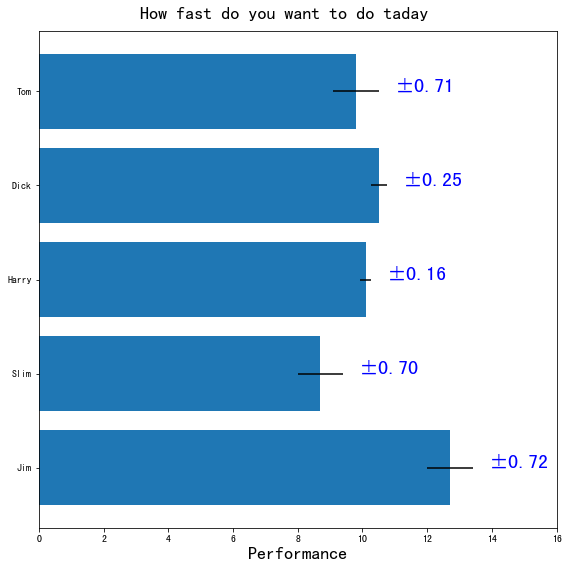

In [123]:
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('How fast do you want to do taday', fontsize=18)
ax.barh(y_lable, x, xerr=offset)
locator = matplotlib.ticker.MultipleLocator(2)
ax.xaxis.set_major_locator(locator)
ax.set_xlim(0, 16)
ax.set_xlabel('Performance', fontsize=18)

for i in range(5):
    ax.text(x[i] + offset[i]+ 0.2, y_lable[i], offset_lable[i], color = 'blue', fontsize = 20)
    # ax.annotate("",
    #         xy=(item - offset[index], y_lable[index]), xycoords='data',
    #         xytext=(item + offset[index], y_lable[index]), textcoords='data',
    #         arrowprops=dict(arrowstyle="-")
            # );
fig.tight_layout()
plt.show()

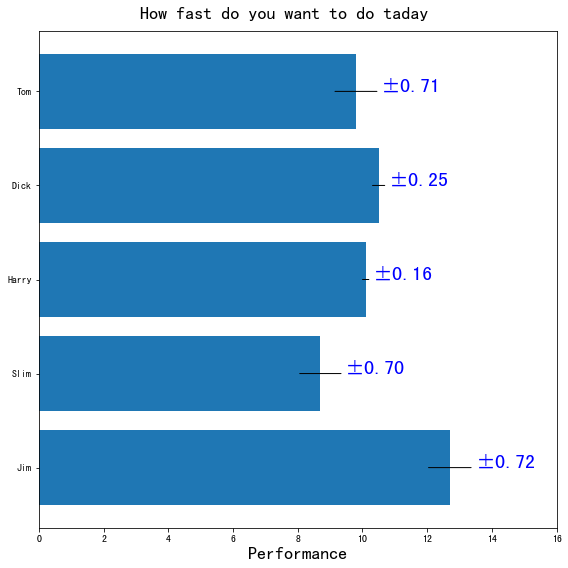

In [129]:
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('How fast do you want to do taday', fontsize=18)
ax.barh(y_lable, x)
locator = matplotlib.ticker.MultipleLocator(2)
ax.xaxis.set_major_locator(locator)
ax.set_xlim(0, 16)
ax.set_xlabel('Performance', fontsize=18)

for i in range(5):
    ax.text(x[i] + offset[i]+ 1, y_lable[i], offset_lable[i], color = 'blue', fontsize = 20, horizontalalignment='center')
    ax.annotate("",
            xy=(x[i] - offset[i], y_lable[i]), xycoords='data',
            xytext=(x[i] + offset[i], y_lable[i]), textcoords='data',
            arrowprops=dict(arrowstyle="-")
            );
fig.tight_layout()
plt.show()